<a href="https://colab.research.google.com/github/Holzlsauer/handson-machine-learning/blob/main/PART%20I%2C%20The%20Fundamentals%20of%20Machine%20Learning/Chapter_III/mnist_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [138]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.base import BaseEstimator
from sklearn.datasets import fetch_openml
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier

# Setup

In [139]:
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [140]:
X, y = mnist['data'], mnist['target'].astype('uint8')

print(f'X shape: {X.shape}')
print(f'y shape: {y.shape}')

X shape: (70000, 784)
y shape: (70000,)


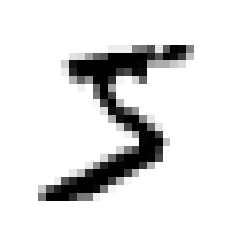


Legenda: 5


In [141]:
plt.imshow(X[0].reshape(28,28), cmap='gray_r')
plt.axis('off')
plt.show()

print(f'\nLegenda: {y[0]}')

In [142]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

# Digit 5 Classifier

In [143]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [144]:
sgd = SGDClassifier(random_state=42)
sgd.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [145]:
sgd.predict([X[0]])

array([ True])

## Metrics

In [146]:
cross_val_score(model, X_train, y_train_5, cv=5, scoring='accuracy')

array([0.95466667, 0.96975   , 0.9635    , 0.96533333, 0.94841667])

In [147]:
y_train_pred_5 = cross_val_predict(model, X_train, y_train_5, cv=5)

In [148]:
confusion_matrix(y_train_5, y_train_pred_5)

array([[53115,  1464],
       [  916,  4505]])

### Precision / Recall / F1-Score

In [149]:
def report(y_true, y_pred):
    print(f'{"Precision score: ":<18}{precision_score(y_pred, y_true)}')
    print(f'{"Recall score: ":<18}{recall_score(y_pred, y_true)}')
    print(f'{"F1 score: ":<18}{f1_score(y_pred, y_true)}')

In [150]:
report(y_train_5, y_train_pred_5)

Precision score:  0.8310274857037447
Recall score:     0.7547327860613168
F1 score:         0.791044776119403


In [151]:
y_scores = cross_val_predict(model, X_train, y_train_5, cv=5, method='decision_function')

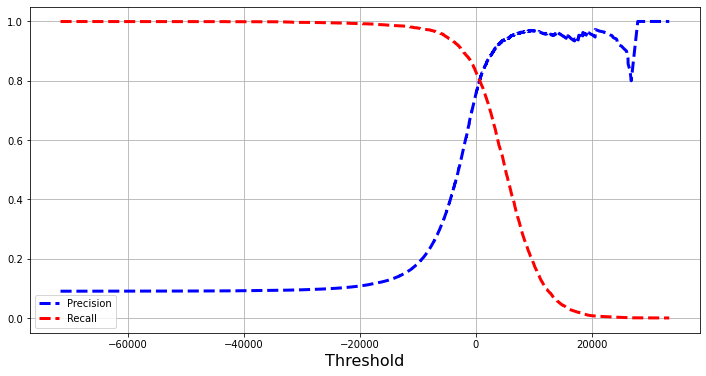

In [152]:
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

plt.figure(figsize=(12,6))
plt.plot(thresholds, precisions[:-1], '--b', linewidth=3, label='Precision')
plt.plot(thresholds, recalls[:-1], '--r', linewidth=3, label='Recall')
plt.legend()
plt.xlabel("Threshold", fontsize=16)
plt.grid(True)
# plt.axis([-50000, 50000, 0, 1])
plt.show()

In [153]:
# Gettin the threshold that gives 90% of precision
index = np.argmax(precisions >= .9) # Returns the position of the first True element
threshold_90 = thresholds[index]
threshold_90

3045.9258227053638

In [154]:
y_pred_90 = (y_scores >= threshold_90)
report(y_pred_90, y_train_5)

Precision score:  0.9002016129032258
Recall score:     0.6589190186312488
F1 score:         0.760890403663862


### Roc Curve

In [155]:
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

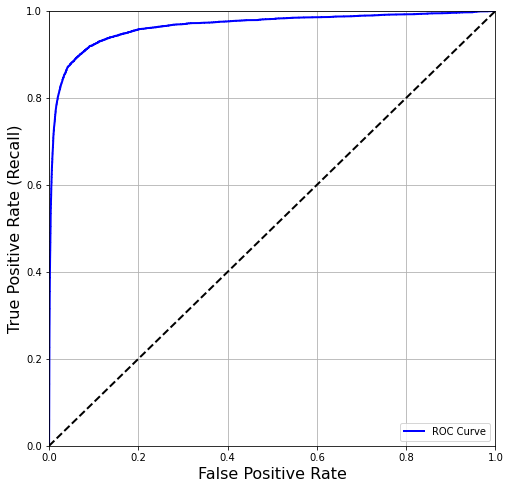

In [156]:
plt.figure(figsize=(8,8))
plt.plot(fpr, tpr, 'b', linewidth=2, label='ROC Curve')
plt.plot([0, 1], [0, 1], '--k', linewidth=2)
plt.ylabel('True Positive Rate (Recall)', fontsize=16)
plt.xlabel('False Positive Rate', fontsize=16)
plt.legend()
plt.grid(True)
plt.axis([0, 1, 0, 1])
plt.show()

In [157]:
sgd_roc_auc = roc_auc_score(y_train_5, y_scores)
sgd_roc_auc

0.9648211175804801

## Comparing models

In [158]:
rfc = RandomForestClassifier(random_state=42)
rfc_scores = cross_val_predict(rfc, X_train, y_train_5, cv=5, method='predict_proba')

y_scores_forest = rfc_scores[:,1] # Prob. of True
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5, y_scores_forest) 

In [159]:
rfc_roc_auc = roc_auc_score(y_train_5, y_scores_forest)
rfc_roc_auc

0.998402186461512

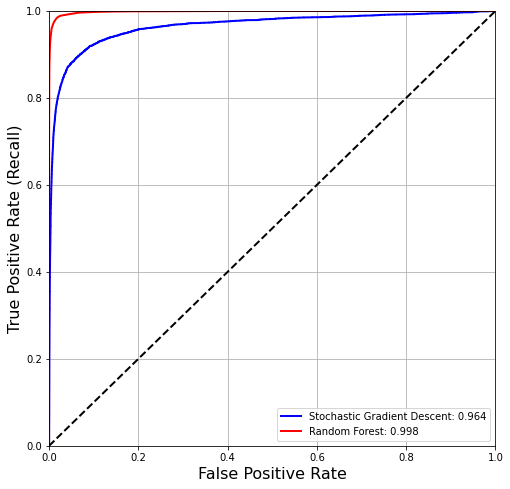

In [160]:
plt.figure(figsize=(8,8))
plt.plot(fpr, tpr, 'b', linewidth=2, label=f'Stochastic Gradient Descent: {str(sgd_roc_auc)[:5]}')
plt.plot(fpr_forest, tpr_forest, 'r', linewidth=2, label=f'Random Forest: {str(rfc_roc_auc)[:5]}')
plt.plot([0, 1], [0, 1], '--k', linewidth=2)
plt.ylabel('True Positive Rate (Recall)', fontsize=16)
plt.xlabel('False Positive Rate', fontsize=16)
plt.legend()
plt.grid(True)
plt.axis([0, 1, 0, 1])
plt.show()